In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy
!pip install insightface
# !pip install onnxruntime
!pip install onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 90.0 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1060430 sha256=8dc179a7c1049917f7bc44ea5da2eb5c77156a2db7f6a5e52ea924c3e6f2aabd
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.4 MB/s eta 0:00:00


In [3]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [4]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 2.0.2


In [5]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:02<00:00, 101164.19KB/s]


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishesh1412/celebrity-face-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 52.9M/52.9M [00:02<00:00, 19.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1


In [ ]:
cp -r /root/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1 /content/drive/MyDrive/fake_generated_data

In [6]:
swapper = insightface.model_zoo.get_model('/content/drive/MyDrive/Rag_folder/inswapper_128.onnx',
                                download=False,
                                download_zip=False)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
inswapper-shape: [1, 3, 128, 128]


In [ ]:
assert float('.'.join(insightface.__version__.split('.')[:2]))>=float('0.7')

In [ ]:
import os

directory = '/content/drive/MyDrive/Rag_folder/video_data/'
print("Files in directory:", os.listdir(directory))
img = ins_get_image('/content/drive/MyDrive/Rag_folder/video_data/asif.png')

Files in directory: ['3.jpg', '5.JPEG', 'asif.png', 'smile_blink.mp4', '.ipynb_checkpoints']


AssertionError: /content/drive/MyDrive/Rag_folder/video_data/asif.png not found

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will open a file picker to upload an image

# Step 2: Get the uploaded file name
uploaded_file_name = list(uploaded.keys())[0]  # Get the name of the first uploaded file
print(f"Uploaded file: {uploaded_file_name}")

img = cv2.imread(uploaded_file_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


Saving 1.PNG to 1 (3).PNG
Uploaded file: 1 (3).PNG


TypeError: unhashable type: 'numpy.ndarray'

In [7]:
imgs = cv2.imread('/content/drive/MyDrive/Rag_folder/deepfake/png-transparent-cristiano-ronaldo-playing-football-cristiano-ronaldo-real-madrid-c-f-sport-football-player-cristiano-ronaldo-game-sports-equipment-jersey-thumbnail.png')
# /content/drive/MyDrive/Rag_folder/deepfake/png-transparent-cristiano-ronaldo-playing-football-cristiano-ronaldo-real-madrid-c-f-sport-football-player-cristiano-ronaldo-game-sports-equipment-jersey-thumbnail.png
imgs_rgb = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
imgt = cv2.imread('/content/drive/MyDrive/Rag_folder/deepfake/ozil.jpg')
# /content/drive/MyDrive/Rag_folder/deepfake/ozil.jpg
imgt_rgb = cv2.cvtColor(imgt, cv2.COLOR_BGR2RGB)
faces = app.get(imgt)
source_faces=app.get(imgs)
source_face=source_faces[0]
res = imgt.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

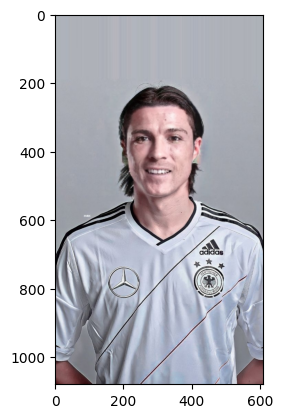

In [8]:
import matplotlib.pyplot as plt
plt.imshow(res[:,:,::-1])
plt.show()

In [9]:
def generate_fake(video_path, output_video_path, source_face ):
  video_capture = cv2.VideoCapture(video_path)
  frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
  frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fps = int(video_capture.get(cv2.CAP_PROP_FPS))
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')

  video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

  while True:
      # Capture frame-by-frame
      ret, frame = video_capture.read()
      if not ret:
          break  # End of video

      # Detect faces in the frame
      faces = app.get(frame)
      res = frame.copy()
      for face in faces:
        res = swapper.get(res, face, source_face, paste_back=True)


      # Display the frame with annotations

      video_writer.write(res)


  video_capture.release()
  video_writer.release()
  # cv2.destroyAllWindows()

In [ ]:
def automate_gen_folder(source_folder,video_path):
  image_extensions = {'.jpg', '.jpeg', '.png'}
  base_folder_name = os.path.basename(source_folder)
  count = 0
  for filename in tqdm(os.listdir(source_folder), desc="Processing images"):

    if any(filename.lower().endswith(ext) for ext in image_extensions):
        file_path = os.path.join(source_folder, filename)
        imgs = cv2.imread(file_path)
        source_faces=app.get(imgs)
        if len(source_faces) == 0:
            print(f"No faces found in {file_path}")
            continue
        source_face=source_faces[0]
        base_name = os.path.basename(file_path)
        name_without_ext = os.path.splitext(base_name)[0]
        # print(base_name)
        # print(name_without_ext)
        output_video_path = f'/content/drive/MyDrive/fake_generated_data/fake/spoofed_{base_folder_name}_{name_without_ext}.mp4'
        generate_fake(video_path, output_video_path, source_face )
        count +=1
        if(count==10):
          break



In [ ]:
import os
from tqdm import tqdm

def automate_all_generate(source_folder, fake_folder):
  image_extensions = {'.jpg', '.jpeg', '.png'}
  video_path = '/content/drive/MyDrive/fake_generated_data/source/temp1.mp4'
  for name in tqdm(os.listdir(source_folder), desc="Listing directories"):
    full_path = os.path.join(source_folder, name)
    # print(full_path)
    if os.path.isdir(full_path):
      base_name = os.path.basename(full_path)
      print(base_name)
      automate_gen_folder(full_path,video_path)




  print("Done!!!")











In [ ]:
automate_all_generate('/content/drive/MyDrive/fake_generated_data/1/celeb_face','/content/drive/MyDrive/Rag_folder/video_data/fakes')

Listing directories:   0%|          | 0/9 [00:00<?, ?it/s]

Brad_Pitt



Listing directories:  11%|█         | 1/9 [07:26<59:30, 446.32s/it]

Denzel_Washington



Processing images:   2%|▏         | 2/100 [01:29<1:13:14, 44.84s/it]

No faces found in /content/drive/MyDrive/fake_generated_data/1/celeb_face/Denzel_Washington/003_b622e925.jpg



Listing directories:  22%|██▏       | 2/9 [14:51<51:58, 445.45s/it]

Hugh_Jackman



Listing directories:  33%|███▎      | 3/9 [22:16<44:31, 445.30s/it]

Johnny_Depp



Listing directories:  44%|████▍     | 4/9 [29:37<36:58, 443.76s/it]

Leonardo_DiCaprio



Listing directories:  56%|█████▌    | 5/9 [36:58<29:30, 442.55s/it]

Robert_Downey



Listing directories:  67%|██████▋   | 6/9 [44:17<22:04, 441.43s/it]

Tom_Cruise



Listing directories:  78%|███████▊  | 7/9 [51:40<14:43, 442.00s/it]

Tom_Hanks



Processing images:   7%|▋         | 7/100 [05:09<1:08:23, 44.12s/it]

No faces found in /content/drive/MyDrive/fake_generated_data/1/celeb_face/Tom_Hanks/008_74cd0628.jpg



Listing directories:  89%|████████▉ | 8/9 [59:02<07:22, 442.05s/it]

Will_Smith



Processing images:   0%|          | 0/100 [00:00<?, ?it/s]

No faces found in /content/drive/MyDrive/fake_generated_data/1/celeb_face/Will_Smith/001_beebcee2.jpg



Processing images:   7%|▋         | 7/100 [04:24<1:04:53, 41.87s/it]

No faces found in /content/drive/MyDrive/fake_generated_data/1/celeb_face/Will_Smith/008_cdaf39e7.jpg



Listing directories: 100%|██████████| 9/9 [1:06:24<00:00, 442.68s/it]

Done!!!


In [ ]:

input='/content/drive/MyDrive/Rag_folder/video_data/sources/Leonardo_DiCaprio_2010.jpg'

imgs = cv2.imread(input)
source_faces=app.get(imgs)
source_face=source_faces[0]
base_name2 = os.path.basename(input)
name_without_ext2 = os.path.splitext(base_name2)[0]

output_video_path = f'/content/drive/MyDrive/Rag_folder/video_data/{name_without_ext2}.mp4'
video_path = '/content/drive/MyDrive/Rag_folder/video_data/smile_blink.mp4'

generate_fake(video_path, output_video_path, source_face )

In [ ]:
video_capture = cv2.VideoCapture(video_path)
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        break  # End of video

    # Detect faces in the frame
    faces = app.get(frame)
    res = frame.copy()
    for face in faces:
      res = swapper.get(res, face, source_face, paste_back=True)


    # Display the frame with annotations

    video_writer.write(res)


video_capture.release()
video_writer.release()
# cv2.destroyAllWindows()

# Building Models

In [ ]:
!pip install tensorflow-datasets

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zuozhaorui/celeba")

# print("Path to dataset files:", path)



100%|██████████| 2.64G/2.64G [00:39<00:00, 72.4MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zuozhaorui/celeba/versions/1


In [ ]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import models,transforms

import glob
import os.path as osp
import random
import numpy as np
import json
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models,transforms

torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [ ]:
!cd /root/.cache/kagglehub/datasets/vishesh1412/
!ls

/bin/bash: line 1: cd: too many arguments
sample_data


In [ ]:
!ls

sample_data


In [ ]:
def make_datapath_list(root_path):
    """
    Returns:
    -----------
    path_list:list
    保存数据路径的列表
    """
    #root_path='/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset'
    target_path=osp.join(root_path+'/**/*.jpg')
    #print(target_path)

    path_list=[]

    #使用glob取得文件路径
    return glob.glob(target_path)

root_path='/root/.cache/kagglehub/datasets/zuozhaorui/celeba/versions/1'
l=make_datapath_list(root_path)

train_num=int(len(l)*0.8)
train_list=l[:train_num]
test_list=l[train_num:]
len(test_list)

40520

In [ ]:
#创建Dataset
class CelebDataset(data.Dataset):
    """
    file_path:list
    transform:object
    phase:'train' or 'val'
    """
    def __init__(self,file_list,transform=None,phase='train'):
        self.file_list=file_list
        self.transform=transform
        self.phase=phase
    def __len__(self):
        return len(self.file_list)

    def __getitem__(self,index):
        """
        获取预处理完毕的图片的张量数据和标签
        """
        img_path=self.file_list[index]
        img=Image.open(img_path)
        img_tranformed=self.transform(img)



        return img_tranformed

Input_size=(128,128)
transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize(Input_size),
    torchvision.transforms.ToTensor(),
])
train_dataset=CelebDataset(file_list=train_list,transform=transform,phase='train')
test_dataset=CelebDataset(file_list=test_list,transform=transform,phase='test')

index=1
print(train_dataset.__getitem__(index))
print(train_dataset.__getitem__(index)[0].size())


tensor([[[0.1882, 0.1843, 0.1765,  ..., 0.0000, 0.0000, 0.0000],
         [0.1882, 0.1882, 0.1804,  ..., 0.0000, 0.0000, 0.0000],
         [0.1804, 0.1882, 0.1843,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.3059, 0.2784, 0.2863,  ..., 0.4588, 0.4588, 0.5216],
         [0.3216, 0.3216, 0.3255,  ..., 0.4745, 0.4510, 0.4941],
         [0.2745, 0.3451, 0.3490,  ..., 0.4627, 0.4510, 0.4549]],

        [[0.0980, 0.0941, 0.0863,  ..., 0.0000, 0.0000, 0.0000],
         [0.0980, 0.0980, 0.0902,  ..., 0.0000, 0.0000, 0.0000],
         [0.0902, 0.0980, 0.0941,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.3294, 0.2980, 0.2863,  ..., 0.4863, 0.4863, 0.5490],
         [0.3569, 0.3569, 0.3412,  ..., 0.5020, 0.4784, 0.5216],
         [0.3137, 0.3765, 0.3686,  ..., 0.4902, 0.4784, 0.4824]],

        [[0.1294, 0.1255, 0.1176,  ..., 0.0000, 0.0000, 0.0000],
         [0.1294, 0.1294, 0.1216,  ..., 0.0000, 0.0000, 0.0000],
         [0.1216, 0.1294, 0.1255,  ..., 0.0000, 0.0000, 0.

In [ ]:
#创建DataLoader
batch_size=32
train_dataloader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_dataloader=torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
dataloaders_dict={
    'train':train_dataloader,
    'test':test_dataloader
}

batch_iter=iter(dataloaders_dict['train'])#转成迭代器
inputs=next(batch_iter)#取第一个元素
print(inputs.size())


torch.Size([32, 3, 128, 128])


In [ ]:
import torch.nn.functional as F
# 定义 VAE 模型
class VAE(nn.Module):
    def __init__(self,z_dim):
        super().__init__()
        self.z_dim=z_dim
        self.encoder_convs=[]
        self.decoder_convs=[]
        self.encoder_out_channels=[32,64,64,64]
        self.decoder_out_channels=[64,64,32]
        self.encoder_convs.append(nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=2,padding=1))
        self.encoder_convs.append(nn.Conv2d(32,64,3,2,1))
        self.encoder_convs.append(nn.Conv2d(64,64,3,2,1))
        self.encoder_convs.append(nn.Conv2d(64,64,3,2,1))


        self.fc1=nn.Linear(4096,self.z_dim*2)
        self.fc2=nn.Linear(self.z_dim,4096)
        #self.fc2=nn.Linear(4096,self.z_dim)
        self.decoder_convs.append(nn.ConvTranspose2d(64,64,3,2,1,1))
        self.decoder_convs.append(nn.ConvTranspose2d(64,64,3,2,1,1))
        self.decoder_convs.append(nn.ConvTranspose2d(64,32,3,2,1,1))
        self.decoder_convs.append(nn.ConvTranspose2d(32,3,3,2,1,1))


        self.encoder_batchnorm=[]
        self.decoder_batchnorm=[]
        for out_c in self.encoder_out_channels:
            self.encoder_batchnorm.append(nn.BatchNorm2d(out_c))
        for out_c in self.decoder_out_channels:
             self.decoder_batchnorm.append(nn.BatchNorm2d(out_c))
        self.layers = nn.ModuleList()
        self.layers=nn.ModuleList(self.encoder_convs+self.encoder_batchnorm+
                                  self.decoder_convs+self.decoder_batchnorm)
        #self.layers.append(self.fc1)
        #self.layers.append(self.fc2)
    def forward(self, x):
        for convs,BN in zip(self.encoder_convs,self.encoder_batchnorm):
            #print(x.device)
            x=convs(x)
            x = BN(x)
            x = F.leaky_relu(x)
            x = nn.Dropout(0.25)(x)
        shape_before_flattening = x.shape
        x=nn.Flatten()(x)

        x = self.fc1(x)

        mu, log_var = x.split(self.z_dim, dim=1)
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        x = mu + std * eps

        x=self.fc2(x)
        x=x.reshape(shape_before_flattening)
        for i in range(len(self.decoder_convs)):
            convs=self.decoder_convs[i]
            x=convs(x)
            if(i<len(self.decoder_convs)-1):
                BN=self.decoder_batchnorm[i]
                x = BN(x)
                x = F.leaky_relu(x)
                x = nn.Dropout(0.25)(x)
            else:
                x=torch.sigmoid(x)
        return x,mu,log_var

model=VAE(200)


In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary

summary(model, input_size=inputs.size()[1:], batch_size=-1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
       BatchNorm2d-2           [-1, 32, 64, 64]              64
            Conv2d-3           [-1, 64, 32, 32]          18,496
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 16, 16]          36,928
       BatchNorm2d-6           [-1, 64, 16, 16]             128
            Conv2d-7             [-1, 64, 8, 8]          36,928
       BatchNorm2d-8             [-1, 64, 8, 8]             128
            Linear-9                  [-1, 400]       1,638,800
           Linear-10                 [-1, 4096]         823,296
  ConvTranspose2d-11           [-1, 64, 16, 16]          36,928
      BatchNorm2d-12           [-1, 64, 16, 16]             128
  ConvTranspose2d-13           [-1, 64, 32, 32]          36,928
      BatchNorm2d-14           [-1, 64,

In [ ]:
names=[]
for name,_ in list(model.named_parameters()):
    names.append(name)
names[:5]

['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'layers.0.weight']

In [ ]:
R_LOSS_FACTOR = 10000
def rmse_loss(recon,x):
    return torch.mean(torch.pow(recon-x,2),dim=(1,2,3))
def rmse_loss1(recon,x):
    return torch.mean(torch.pow(recon-x,2))
def kl_loss1(mu,log_var):
    return -0.5 * torch.sum(1+log_var-torch.exp(log_var)-mu**2,axis=1)
def kl_loss(mu,log_var):
    return -0.5*torch.sum(1+log_var-torch.pow(mu,2)-torch.exp(log_var),axis=1)
def vae_loss(recon, x, mu, log_var):
    return torch.sum(rmse_loss(recon,x)*R_LOSS_FACTOR+kl_loss(mu,log_var))
criterion=vae_loss
device=torch.device('cpu' if torch.cuda.is_available() else 'cpu')
inputs=inputs.to(device)
model=model.to(device)
x,mu,log_var=model(inputs)
torch.sum(rmse_loss(inputs,x)),kl_loss(mu,log_var),kl_loss1(mu,log_var),rmse_loss1(inputs,x)*32

(tensor(3.7665, grad_fn=<SumBackward0>),
 tensor([21.2158, 50.1114, 33.0256, 71.2018, 28.8437, 42.3588, 40.0385, 33.5755,
         23.0613, 27.3832, 30.0511, 41.7318, 77.8990, 40.0084, 20.2690, 34.2311,
         29.7066, 32.4574, 26.6554, 28.9112, 15.9392, 30.2095, 40.4479, 17.6545,
         36.9243, 15.5602, 44.7321, 12.5570, 58.6637, 28.8783, 32.3249, 21.6331],
        grad_fn=<MulBackward0>),
 tensor([21.2158, 50.1114, 33.0256, 71.2018, 28.8437, 42.3588, 40.0385, 33.5755,
         23.0613, 27.3832, 30.0511, 41.7318, 77.8990, 40.0084, 20.2690, 34.2311,
         29.7066, 32.4574, 26.6554, 28.9112, 15.9392, 30.2095, 40.4479, 17.6545,
         36.9243, 15.5602, 44.7321, 12.5570, 58.6637, 28.8783, 32.3249, 21.6331],
        grad_fn=<MulBackward0>),
 tensor(3.7665, grad_fn=<MulBackward0>))

In [ ]:
#模型训练

#torch.backends.cudnn.benchmark=True
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device：',device)
net=VAE(200).to(device)
criterion=vae_loss
optimizer=optim.Adam(params=net.parameters(),lr=0.0005)

num_epochs=3

for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1,num_epochs))
    print('-------------------------')

    for phase in ['train','test']:
        if phase=='train':
            net.train()
        else:
            net.eval()

        epoch_loss=0
        epoch_kl=0

        for inputs in tqdm(dataloaders_dict[phase]):
            inputs=inputs.to(device)
            optimizer.zero_grad()
            with torch.set_grad_enabled(phase=='train'):
                #print(inputs.device)
                #inputs.
                recon,mu,log_var=net(inputs)
                #print(recon.device,mu.device,inputs.device)

                loss=criterion(recon,inputs, mu, log_var)
                epoch_kl+=torch.sum(kl_loss(mu,log_var))
                #print(loss.item(),kl_loss(mu,log_var).item())
                epoch_loss+=loss
                #print(loss)
                if phase=='train':
                    loss.backward()
                    optimizer.step()


        epoch_loss=epoch_loss/len(dataloaders_dict[phase].dataset)
        epoch_kl=epoch_kl/len(dataloaders_dict[phase].dataset)
        print('{} Loss:{:.4f} kl_loss:{:.4f} '.format(phase,epoch_loss,epoch_kl))



device： cuda:0
Epoch 1/3
-------------------------


100%|██████████| 5065/5065 [05:28<00:00, 15.40it/s]


train Loss:280.3730 kl_loss:56.6138 


100%|██████████| 1267/1267 [01:18<00:00, 16.05it/s]


test Loss:228.4421 kl_loss:55.9911 
Epoch 2/3
-------------------------


100%|██████████| 5065/5065 [04:58<00:00, 16.98it/s]


train Loss:228.6871 kl_loss:57.2576 


100%|██████████| 1267/1267 [01:09<00:00, 18.24it/s]


test Loss:220.7639 kl_loss:54.8316 
Epoch 3/3
-------------------------


100%|██████████| 5065/5065 [04:23<00:00, 19.20it/s]


train Loss:221.9529 kl_loss:57.6987 


100%|██████████| 1267/1267 [01:05<00:00, 19.43it/s]

test Loss:215.3909 kl_loss:56.1973 


In [ ]:
def predict(net,z):

    x = z

    x=net.fc2(x)
    x=x.reshape((-1, 64, 8, 8))
    for i in range(len(net.decoder_convs)):
            convs=net.decoder_convs[i]
            x=convs(x)
            if(i<len(net.decoder_convs)-1):
                BN=net.decoder_batchnorm[i]
                x = BN(x)
                x = F.leaky_relu(x)
                x = nn.Dropout(0.25)(x)
            else:
                x=torch.sigmoid(x)
    return x

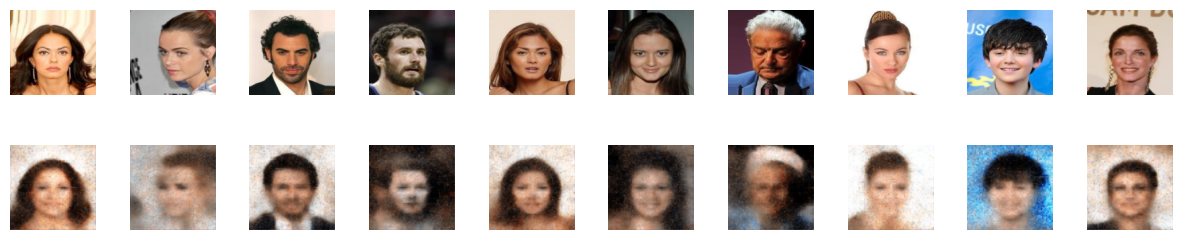

In [ ]:
n_to_show = 10


from torch.utils.data import WeightedRandomSampler,DataLoader

dataloader = DataLoader(dataset=test_dataset,
                    batch_size=32,  # 组织成batch大小
                    sampler=WeightedRandomSampler(torch.ones(len(test_dataset)), 32))

example_batch=next(iter(dataloader))
example_images = example_batch.to(device)
net.eval()
reconst_images,mu,log_var=net(example_images)


fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.imshow(img.cpu().numpy().transpose((1,2,0)))

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img.detach().cpu().numpy().transpose((1,2,0)))
fig.savefig('2.png')

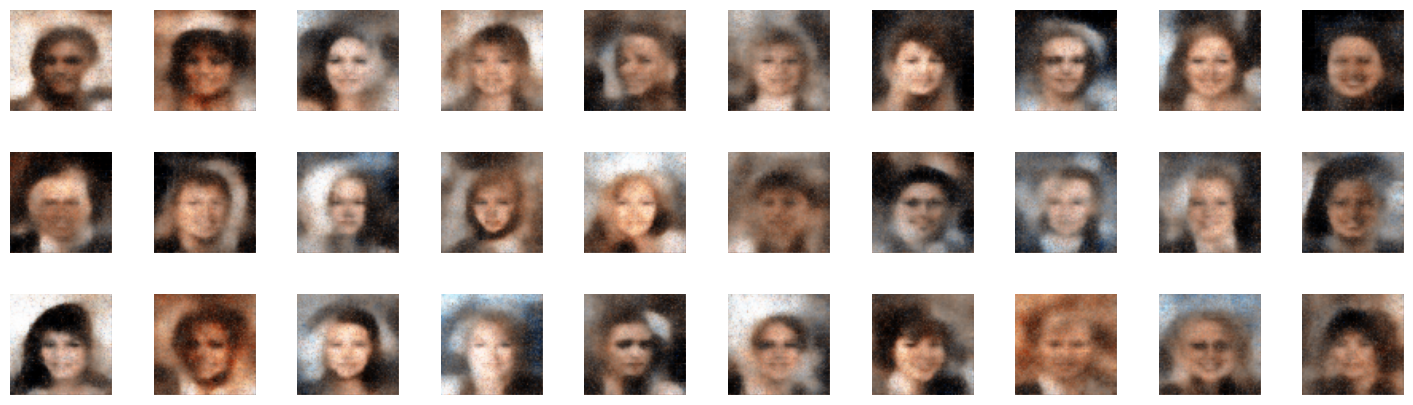

In [ ]:
n_to_show = 30

znew = np.random.normal(size = (n_to_show,net.z_dim))

reconst = predict(net,torch.randn_like(mu))

fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = reconst[i].squeeze()
    ax = fig.add_subplot(3, 10, i+1)
    ax.imshow(img.detach().cpu().numpy().transpose((1,2,0)))
    ax.axis('off')

plt.show()
fig.savefig('1.png')

# V1

In [ ]:
!pip install torch torchvision opencv-python facenet-pytorch matplotlib numpy


INFO: pip is looking at multiple versions of facenet-pytorch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.7 MB/s eta 0:00:00


In [ ]:
from facenet_pytorch import InceptionResnetV1
import torch
import torch.nn as nn
import torch.optim as optim
class IdentityEncoder(nn.Module):
    def __init__(self):
        super(IdentityEncoder, self).__init__()
        self.backbone = InceptionResnetV1(pretrained='vggface2').eval()  # Pre-trained ArcFace

    def forward(self, x):
        with torch.no_grad():
            return self.backbone(x)  # Output identity embeddings


In [ ]:
class AttentionBlock(nn.Module):
    def __init__(self, in_channels, attention_channels):
        super(AttentionBlock, self).__init__()
        self.attention = nn.Sequential(
            nn.Conv2d(in_channels, attention_channels, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(attention_channels, in_channels, kernel_size=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        attention_map = self.attention(x)
        return x * attention_map


class FaceSwapperGenerator(nn.Module):
    def __init__(self):
        super(FaceSwapperGenerator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(6, 64, kernel_size=3, stride=1, padding=1),  # Combine source + target
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.attention = AttentionBlock(128, 64)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid(),  # Output pixel values in [0, 1]
        )

    def forward(self, identity_latent, target_face):
        combined_input = torch.cat((identity_latent, target_face), dim=1)
        encoded = self.encoder(combined_input)
        attended = self.attention(encoded)
        return self.decoder(attended)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 1, kernel_size=4, stride=1, padding=1),
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
def identity_loss(source_embedding, swapped_embedding):
    return nn.MSELoss()(source_embedding, swapped_embedding)

def adversarial_loss(prediction, target):
    return nn.BCEWithLogitsLoss()(prediction, target)

def reconstruction_loss(swapped_face, target_face):
    return nn.L1Loss()(swapped_face, target_face)


25
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])
torch.Size([4])


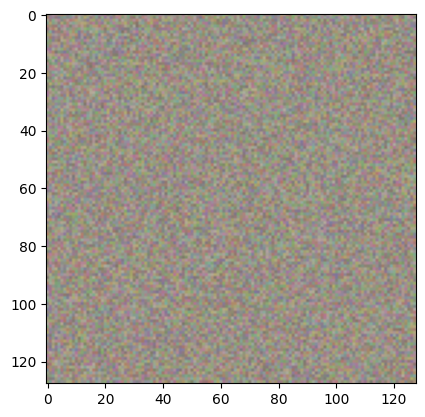

In [ ]:
from torchvision.datasets import FakeData
import matplotlib.pyplot as plt
import torchvision.transforms as T

dataset = FakeData(size=100, image_size=(3, 128, 128), transform=transform)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)
print(len(data_loader))
for source_face, target_face in data_loader:
    # print(source_face.shape)
    # print(target_face.shape)
    face_tensor = source_face[0]
    face_numpy = face_tensor.permute(1, 2, 0).detach().cpu().numpy()  # [H, W, C]

    # If the image is normalized, de-normalize it (adjust as per your preprocessing)
    transform = T.Normalize(mean=[-2.1179, -2.0357, -1.8044], std=[4.3668, 4.4643, 4.4444])
    face_numpy = transform(face_tensor).permute(1, 2, 0).clamp(0, 1).detach().cpu().numpy()
    plt.imshow(face_numpy)


In [ ]:
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
from torchvision.datasets import FakeData

# Initialize models
identity_encoder = IdentityEncoder()
generator = FaceSwapperGenerator()
discriminator = Discriminator()

# Optimizers
gen_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Fake dataset for prototyping
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
dataset = FakeData(size=100, image_size=(3, 128, 128), transform=transform)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Training loop
for epoch in range(20):  # Train for 20 epochs
    for source_face, target_face in data_loader:
        # Identity encoding
        source_embedding = identity_encoder(source_face)
        with torch.no_grad():
            # target_embedding = identity_encoder(target_face)
            # Identity encoding
            if target_face.ndim == 3:  # [C, H, W]
                target_face = target_face.unsqueeze(0)  # Add batch dimension: [1, C, H, W]
            elif target_face.ndim == 2:  # [H, W]
                target_face = target_face.unsqueeze(0).unsqueeze(0)  # Add channel and batch dimensions: [1, 1, H, W]
            source_embedding = identity_encoder(source_face)  # Output is [B, 512]
            source_embedding = source_embedding.unsqueeze(-1).unsqueeze(-1)  # Add spatial dimensions: [B, 512, 1, 1]
            source_embedding = source_embedding.expand(-1, -1, target_face.size(2), target_face.size(3))  # Match spatial dims: [B, 512, H, W]

        # Pass through generator
        swapped_face = generator(source_embedding, target_face)  # Now source_embedding is compatible


        # Generator forward pass
        # swapped_face = generator(source_embedding.unsqueeze(-1).unsqueeze(-1), target_face)

        # Train discriminator
        real_preds = discriminator(target_face)
        fake_preds = discriminator(swapped_face.detach())
        real_loss = adversarial_loss(real_preds, torch.ones_like(real_preds))
        fake_loss = adversarial_loss(fake_preds, torch.zeros_like(fake_preds))
        disc_loss = (real_loss + fake_loss) / 2
        disc_optimizer.zero_grad()
        disc_loss.backward()
        disc_optimizer.step()

        # Train generator
        fake_preds = discriminator(swapped_face)
        adv_loss = adversarial_loss(fake_preds, torch.ones_like(fake_preds))
        id_loss = identity_loss(source_embedding, target_embedding)
        rec_loss = reconstruction_loss(swapped_face, target_face)
        gen_loss = adv_loss + 10 * id_loss + rec_loss
        gen_optimizer.zero_grad()
        gen_loss.backward()
        gen_optimizer.step()

    print(f"Epoch {epoch + 1}, Gen Loss: {gen_loss.item():.4f}, Disc Loss: {disc_loss.item():.4f}")


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 2)